In [1]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
import numpy as np

In [2]:
model = Sequential()
model.add(Dense(units = 8, input_shape = (6,), activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.summary()

d:\anaconda3\envs\genenet\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
X_train = np.load('train_data.npy')[:, 2:]
Y_train = np.load('train_data.npy')[:, 1]
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = [keras.metrics.BinaryAccuracy()])
history = model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 300)

Epoch 1/300
25/25 - 1s - 36ms/step - binary_accuracy: 0.4893 - loss: 0.7420
Epoch 2/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7016 - loss: 0.6590
Epoch 3/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7168 - loss: 0.6090
Epoch 4/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7509 - loss: 0.5770
Epoch 5/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7699 - loss: 0.5509
Epoch 6/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7863 - loss: 0.5313
Epoch 7/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7914 - loss: 0.5139
Epoch 8/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7939 - loss: 0.4995
Epoch 9/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7939 - loss: 0.4883
Epoch 10/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7952 - loss: 0.4788
Epoch 11/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7977 - loss: 0.4717
Epoch 12/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7977 - loss: 0.4644
Epoch 13/300
25/25 - 0s - 2ms/step - binary_accuracy: 0.7965 - loss: 0.4596
Epoch 14/300
25/25 -

In [4]:
np.save('adam_accuracy.npy', history.history['binary_accuracy'])

In [10]:
X_test = np.load('test_data.npy')[:, 2:]
Y_test = np.load('test_data.npy')[:, 1]

Y_pred = (model.predict(X_test) > 0.5).astype(int)
Y_pred = np.concatenate(Y_pred)

TP = sum((1 == Y_test) & (1 == Y_pred))
FP = sum((0 == Y_test) & (1 == Y_pred))
FN = sum((1 == Y_test) & (0 == Y_pred))
TN = sum((0 == Y_test) & (0 == Y_pred))
print(TP, FP, FN, TN)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27 4 16 53


<Axes: >

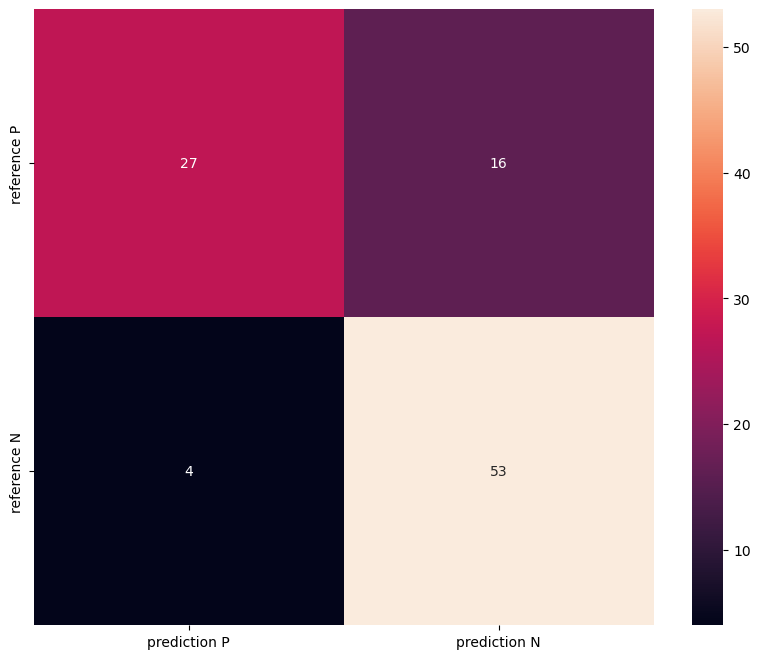

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

df = pd.DataFrame([[TP, FN], [FP, TN]], index=["reference P", "reference N"], columns=["prediction P", "prediction N"])

plt.figure(figsize=(10,8))
sns.heatmap(data=df, annot=True)

In [12]:
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 1000)

Epoch 1/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8344 - loss: 0.3710
Epoch 2/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8357 - loss: 0.3720
Epoch 3/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8357 - loss: 0.3712
Epoch 4/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8331 - loss: 0.3714
Epoch 5/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8357 - loss: 0.3711
Epoch 6/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8331 - loss: 0.3719
Epoch 7/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8369 - loss: 0.3712
Epoch 8/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8357 - loss: 0.3705
Epoch 9/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8357 - loss: 0.3710
Epoch 10/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8344 - loss: 0.3703
Epoch 11/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8394 - loss: 0.3699
Epoch 12/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8369 - loss: 0.3712
Epoch 13/1000
25/25 - 0s - 2ms/step - binary_accuracy: 0.8394 - loss: 0.3703
Epoch 14

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
31 5 12 52


<Axes: >

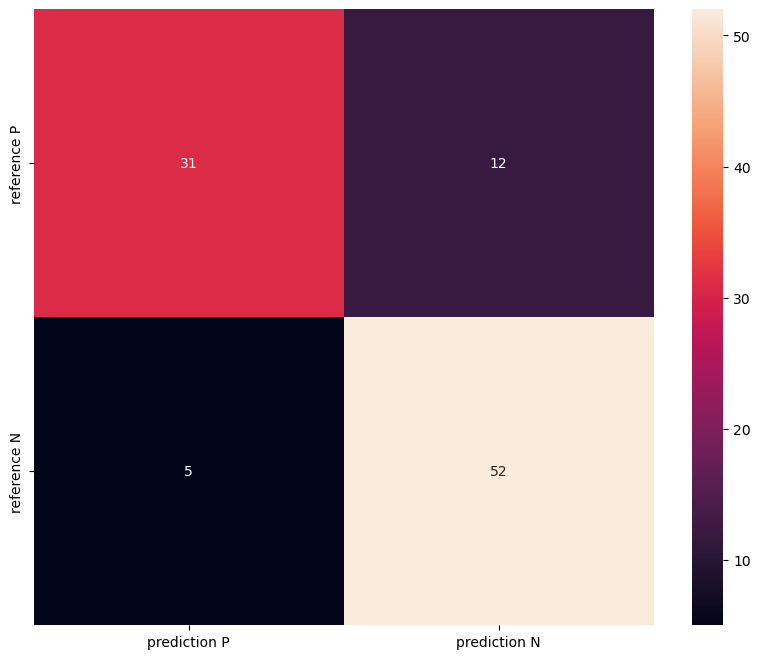

In [13]:
Y_pred = (model.predict(X_test) > 0.5).astype(int)
Y_pred = np.concatenate(Y_pred)

TP = sum((1 == Y_test) & (1 == Y_pred))
FP = sum((0 == Y_test) & (1 == Y_pred))
FN = sum((1 == Y_test) & (0 == Y_pred))
TN = sum((0 == Y_test) & (0 == Y_pred))
print(TP, FP, FN, TN)

df = pd.DataFrame([[TP, FN], [FP, TN]], index=["reference P", "reference N"], columns=["prediction P", "prediction N"])

plt.figure(figsize=(10,8))
sns.heatmap(data=df, annot=True)

In [17]:
np.random.uniform(low=0, high=3, size=1)[0]

2.1934229708348933